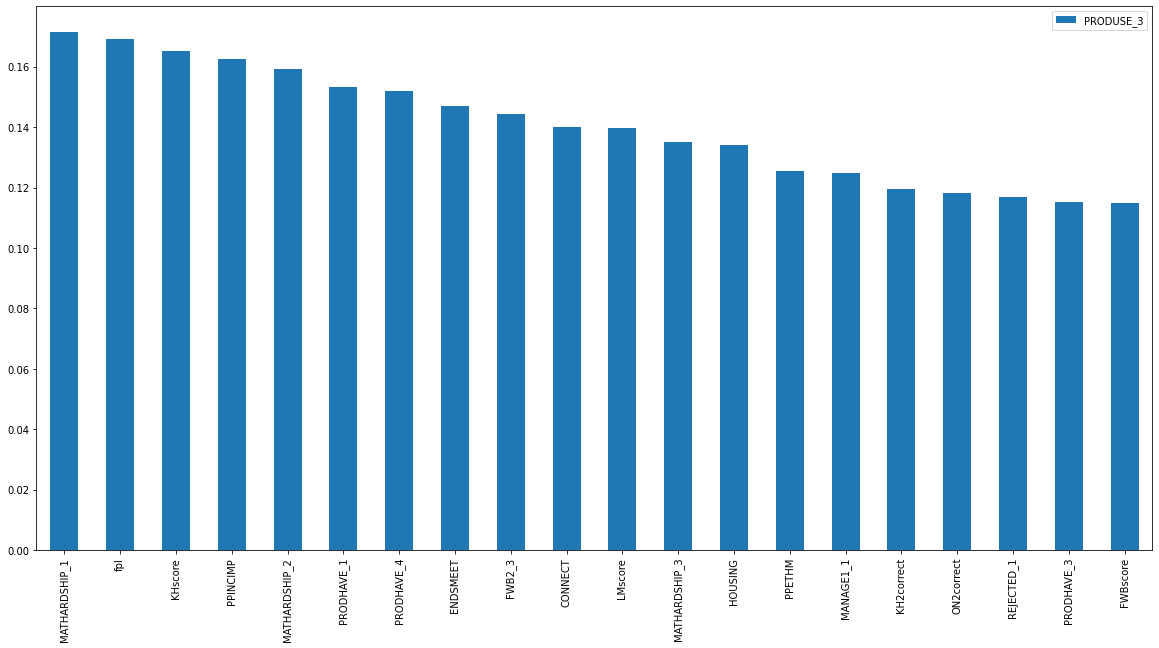

In [20]:
import pandas as pd
data = pd.read_csv('CFPB-financial-wellness-data.csv')
# fig = data.corr()['PRODUSE_3'].plot(kind='bar')
# get top 20 correlations
all = abs(data.corr()['PRODUSE_3']).sort_values(ascending=False).head(22)
# convert all to a dataframe
all = pd.DataFrame(all)
# drop the first one, which is the correlation of the column with itself
all = all.drop(['PRODUSE_3', 'PRODUSE_6'])
all.plot(kind='bar').figure.set_size_inches(20, 10)

# increase size of figure
# fig.figure.set_size_inches(20, 10)

In [22]:
all.index

Index(['MATHARDSHIP_1', 'fpl', 'KHscore', 'PPINCIMP', 'MATHARDSHIP_2',
       'PRODHAVE_1', 'PRODHAVE_4', 'ENDSMEET', 'FWB2_3', 'CONNECT', 'LMscore',
       'MATHARDSHIP_3', 'HOUSING', 'PPETHM', 'MANAGE1_1', 'KH2correct',
       'ON2correct', 'REJECTED_1', 'PRODHAVE_3', 'FWBscore'],
      dtype='object')

In [70]:
data_new = data[['MATHARDSHIP_1', 'fpl', 'KHscore',
       'PRODHAVE_1', 'PRODHAVE_4', 'FWB2_3', 'CONNECT', 'LMscore',
       'HOUSING', 'PPETHM', 'KH2correct',
       'ON2correct', 'REJECTED_1', 'PRODHAVE_3', 'PRODUSE_3']]

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# # Load the dataset
# data = pd.read_csv("mydata.csv")

# # Fit a multiple regression model 
# X = data.drop(columns=["outcome_variable"])
# y = data["outcome_variable"]
target = data_new['PRODUSE_3']
predictor = data_new.drop(columns=['PRODUSE_3'])
model = sm.OLS(target, predictor).fit()

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif["variables"] = predictor.columns
vif["VIF"] = [variance_inflation_factor(predictor.values, i) for i in range(predictor.shape[1])]

# Print variables with high VIF values
print(vif[vif["VIF"] > 5])

        variables        VIF
0   MATHARDSHIP_1   8.150621
1             fpl  18.104707
3      PRODHAVE_1   8.137812
5          FWB2_3   6.051987
6         CONNECT   5.892522
7         LMscore  17.459300
8         HOUSING   6.232172
10     KH2correct   8.581241


In [72]:
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
1,fpl,18.104707
7,LMscore,17.459300
10,KH2correct,8.581241
0,MATHARDSHIP_1,8.150621
3,PRODHAVE_1,8.137812
8,HOUSING,6.232172
5,FWB2_3,6.051987
6,CONNECT,5.892522
13,PRODHAVE_3,4.548679
11,ON2correct,3.602150


In [41]:
vif['variables'].values

array(['MATHARDSHIP_1', 'fpl', 'KHscore', 'MATHARDSHIP_2', 'PRODHAVE_1',
       'PRODHAVE_4', 'ENDSMEET', 'FWB2_3', 'CONNECT', 'LMscore',
       'MATHARDSHIP_3', 'HOUSING', 'PPETHM', 'MANAGE1_1', 'KH2correct',
       'ON2correct', 'REJECTED_1', 'PRODHAVE_3', 'FWBscore'], dtype=object)

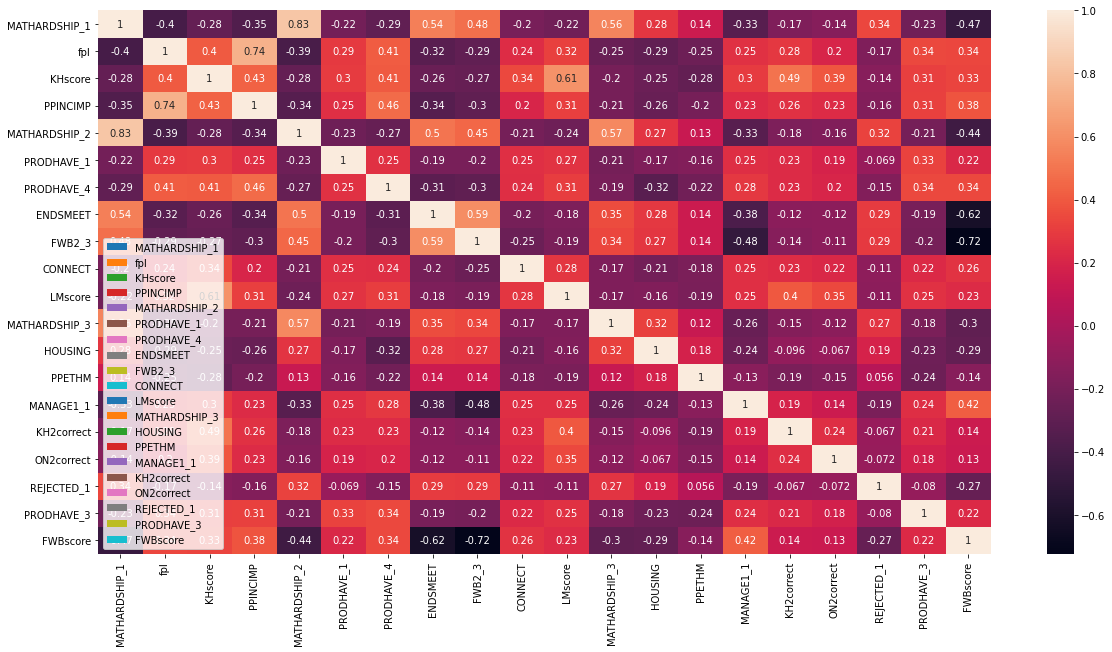

In [42]:
new_corr = ['MATHARDSHIP_1', 'fpl', 'KHscore', 'PPINCIMP', 'MATHARDSHIP_2',
       'PRODHAVE_1', 'PRODHAVE_4', 'ENDSMEET', 'FWB2_3', 'CONNECT',
       'LMscore', 'MATHARDSHIP_3', 'HOUSING', 'PPETHM', 'MANAGE1_1',
       'KH2correct', 'ON2correct', 'REJECTED_1', 'PRODHAVE_3', 'FWBscore']

# data[new_corr].corr()
#plot corr
data[new_corr].corr().plot(kind='bar')
# heatmap
import seaborn as sns
sns.heatmap(data[new_corr].corr(), annot=True).figure.set_size_inches(20, 10)

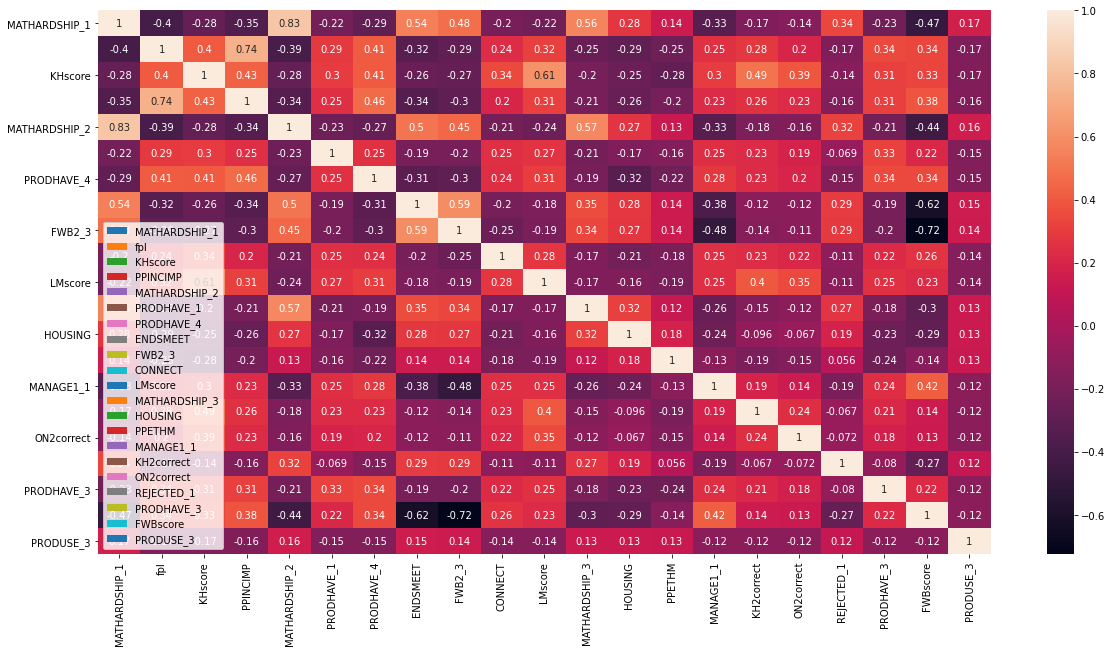

In [47]:
new_corr = ['MATHARDSHIP_1', 'fpl', 'KHscore', 'PPINCIMP', 'MATHARDSHIP_2',
       'PRODHAVE_1', 'PRODHAVE_4', 'ENDSMEET', 'FWB2_3', 'CONNECT',
       'LMscore', 'MATHARDSHIP_3', 'HOUSING', 'PPETHM', 'MANAGE1_1',
       'KH2correct', 'ON2correct', 'REJECTED_1', 'PRODHAVE_3', 'FWBscore', 'PRODUSE_3']

# data[new_corr].corr()
#plot corr
data[new_corr].corr().plot(kind='bar')
# heatmap
import seaborn as sns
sns.heatmap(data[new_corr].corr(), annot=True).figure.set_size_inches(20, 10)

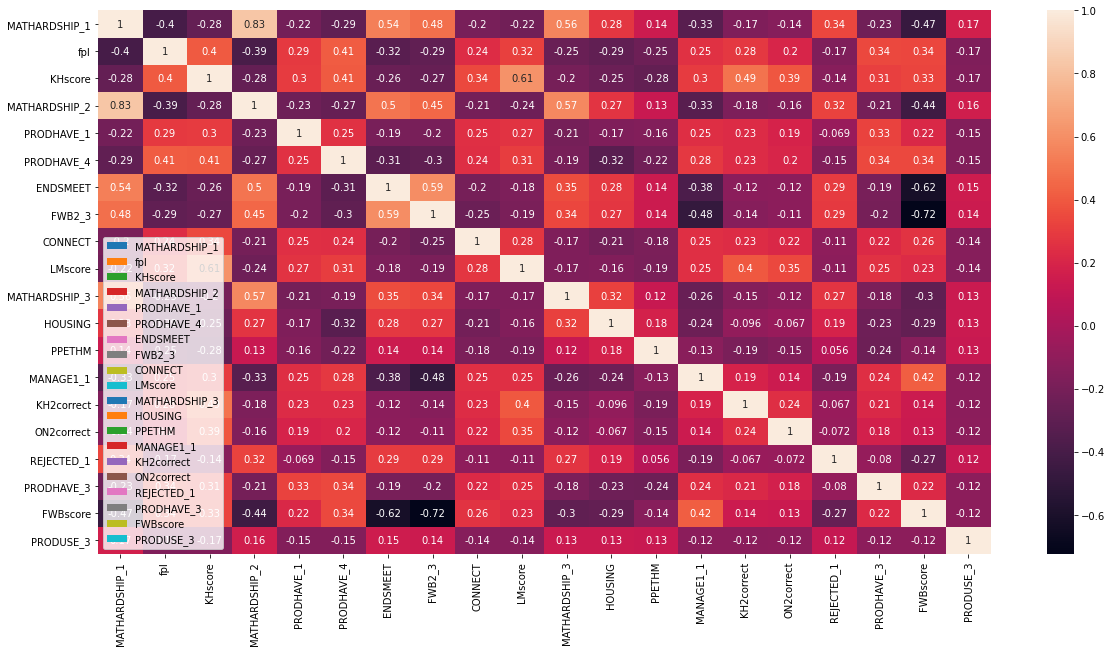

In [36]:
new_corr = ['MATHARDSHIP_1', 'fpl', 'KHscore', 'MATHARDSHIP_2',
       'PRODHAVE_1', 'PRODHAVE_4', 'ENDSMEET', 'FWB2_3', 'CONNECT',
       'LMscore', 'MATHARDSHIP_3', 'HOUSING', 'PPETHM', 'MANAGE1_1',
       'KH2correct', 'ON2correct', 'REJECTED_1', 'PRODHAVE_3', 'FWBscore', 'PRODUSE_3']

# data[new_corr].corr()
#plot corr
data[new_corr].corr().plot(kind='bar')
# heatmap
import seaborn as sns
sns.heatmap(data[new_corr].corr(), annot=True).figure.set_size_inches(20, 10)

In [2]:
# all = all.reset_index()
# switch rows and columns
all = all.transpose()

In [15]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# # Load the dataset
# data = pd.read_csv("mydata.csv")

# # Fit a multiple regression model
# X = data.drop(columns=["outcome_variable"])
# y = data["outcome_variable"]
target = data['PRODUSE_3']
all = all['PRODUSE_3'].values
model = sm.OLS(target, all).fit()

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif["variables"] = all.columns
vif["VIF"] = [variance_inflation_factor(all.values, i) for i in range(all.shape[1])]

# Print variables with high VIF values
print(vif[vif["VIF"] > 5])

ValueError: endog and exog matrices are different sizes

In [5]:
target

0       0
1       0
2       1
3       0
4       0
       ..
6389    0
6390    0
6391    0
6392    0
6393    1
Name: PRODUSE_3, Length: 6394, dtype: int64

In [10]:
all

,PRODUSE_3
MATHARDSHIP_1,0.171378
fpl,0.169273
KHscore,0.165341
PPINCIMP,0.162391
MATHARDSHIP_2,0.159215
PRODHAVE_1,0.153139
PRODHAVE_4,0.152083
ENDSMEET,0.146972
FWB2_3,0.144449
CONNECT,0.139936


In [14]:
all['PRODUSE_3'].values

array([0.17137822, 0.16927346, 0.16534123, 0.16239104, 0.15921467,
       0.1531394 , 0.15208333, 0.14697158, 0.14444918, 0.13993607,
       0.1395688 , 0.1349322 , 0.13405071, 0.12540578, 0.12475464,
       0.11944146, 0.11819382, 0.11694973, 0.11519121, 0.11500406])